**Importing Libararies and Data** 

In [1]:
!pip install gdown sns fastcluster seaborn
!gdown https://drive.google.com/file/d/1ZuWeh_Kvbbuo4DB3WOSIfvN5XT_eMsYc/view?usp=sharing --fuzzy
!tar -xf data.tar.gz

  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 751.0 kB/s eta 0:00:00
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2662 sha256=216480a1032f22fa08cb4e99ad21782c2ce77531b6b13f07420dc9b7efeb0ec5
  Stored in directory: /root/.cache/pip/wheels/cc/26/02/785cf1aeaa8d9e565796a1b962467bcdf62172c8fe12096ffb
Successfully built sns
Downloading...
From: https://drive.google.com/uc?id=1ZuWeh_Kvbbuo4DB3WOSIfvN5XT_eMsYc
To: /kaggle/working/data.tar.gz
100%|██████████████████████████████████████| 57.7M/57.7M [00:00<00:00, 58.6MB/s]


In [2]:
import numpy as np
import pandas as pd
import pickle
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from datetime import datetime
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sb

In [3]:
edges_raw = pd.read_csv("UofT_edges.csv")
occupation_risk_raw = pd.read_csv("UofT_occupation_risk.csv")
nodes_raw = pd.read_csv("UofT_nodes.csv")
data_dict = pd.read_excel("Data dictionary.xlsx")

**Merging data and doing primary analysis**

In [4]:
data_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Node features,NaN,NaN,NaN
1,This table contains the customer features. Cus...,NaN,NaN,NaN
2,Feature,Description,NaN,Type
3,BIRTH_DT,Date of birth of customer,NaN,Date
4,CUST_ADD_DT,Date customer joined bank,NaN,Date
5,OCPTN_NM,Occupation code of the customer. It can be use...,NaN,int
6,RES_CNTRY_CA,Whether customer lives in Canada.,NaN,Bool
7,CNTRY_OF_INCOME_CA,Whether customer received income in Canada.,NaN,Bool
8,PEP_FL,Whether the person is PEP.,NaN,Bool
9,CASH_SUM_IN,Sum of cash in last 12 months,NaN,Float


In [5]:
nodes_raw.head()

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0


In [6]:
occupation_risk_raw.head()

,code,occupation_risk
0,0,Low
1,1,High
2,2,Low
3,3,Low
4,4,Low


In [7]:
edges_raw.head()

,source,target,emt
0,983859.0,544485.0,503.807815
1,605618.0,362627.0,5157.568486
2,323189.0,118238.0,498.628481
3,919153.0,983859.0,401.962668
4,995748.0,983859.0,5095.458776


In [8]:
nodes_raw = nodes_raw.dropna()

*Merging Occupation Risk with Nodes*

In [9]:
def replace_with_dict_values(df1, df2):
    code_occupation_risk = dict(zip(df2['code'], df2['occupation_risk']))
    df1['OCPTN_NM'] = df1['OCPTN_NM'].astype(int).map(code_occupation_risk)
    return df1

In [10]:
nodes_occupation = nodes_raw.copy(deep=True)
replace_with_dict_values(nodes_occupation,occupation_risk_raw)
nodes_occupation.head()

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,High,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,High,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,High,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,High,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,High,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0


*Merging Email Transfers (edges) with node data*

In [11]:
def email_stats(df1, dfz):
    df2 = dfz.dropna()
    source_counts = df2.groupby('source')['emt'].count().to_dict()
    source_sums = df2.groupby('source')['emt'].sum().to_dict()
    target_counts = df2.groupby('target')['emt'].count().to_dict()
    target_sums = df2.groupby('target')['emt'].sum().to_dict()
    
    df1['EMAIL_CNT_OUT'] = df1['CUSTOMER_ID'].map(source_counts).fillna(0)
    df1['EMAIL_SUM_OUT'] = df1['CUSTOMER_ID'].map(source_sums).fillna(0)
    df1['EMAIL_CNT_IN'] = df1['CUSTOMER_ID'].map(target_counts).fillna(0)
    df1['EMAIL_SUM_IN'] = df1['CUSTOMER_ID'].map(target_sums).fillna(0)
    
    return df1

*Unit Testing the function*

In [12]:
dft = pd.DataFrame({
   'source': [1, 2, 3, 4, 5, 1, 2, 4],
   'target': [2, 3, 4, 5, 1, 4, 5, 3],
   'emt': [10.2, 20.3, 30.4, 40.5, 50.6, 60.7, 70.8, 80.9]
})

dfz = pd.DataFrame({
   'CUSTOMER_ID': [1, 2, 3, 4, 5,6]
})
email_stats(dfz,dft)

,CUSTOMER_ID,EMAIL_CNT_OUT,EMAIL_SUM_OUT,EMAIL_CNT_IN,EMAIL_SUM_IN
0,1,2.0,70.9,1.0,50.6
1,2,2.0,91.1,1.0,10.2
2,3,1.0,30.4,2.0,101.2
3,4,2.0,121.4,2.0,91.1
4,5,1.0,50.6,2.0,111.3
5,6,0.0,0.0,0.0,0.0


In [13]:
nodes_occupation_emailtr= email_stats(nodes_occupation, edges_raw)
nodes_occupation_emailtr.head()

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,...,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID,EMAIL_CNT_OUT,EMAIL_SUM_OUT,EMAIL_CNT_IN,EMAIL_SUM_IN
0,1981-09-01,2007-07-05,High,1,1,0.0,2577.785,2.0,2851.663,7.0,...,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0,0.0,0.0,0.0,0.0
1,1994-02-21,2019-05-19,High,1,1,0.0,3035.502,2.0,4805.997,15.0,...,Low,Low,low,Mark Stupar Lecy,Male,2305.0,0.0,0.0,0.0,0.0
2,1962-11-16,2011-08-02,High,1,1,0.0,1617.571,1.0,3482.809,11.0,...,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0,0.0,0.0,0.0,0.0
3,1998-06-20,2001-08-15,High,1,1,0.0,3587.042,5.0,1940.943,8.0,...,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0,0.0,0.0,0.0,0.0
4,1942-01-24,2012-10-28,High,1,1,0.0,1725.524,2.0,13197.169,43.0,...,Low,Low,low,Carolyn Washington Roberts,Female,418265.0,0.0,0.0,0.0,0.0


*Adding Relative Age and Customer Addition date in dataframe*

In [14]:
def calculate_relative_dates(df):
    # convert the columns to datetime format
    df['BIRTH_DT'] = pd.to_datetime(df['BIRTH_DT'])
    df['CUST_ADD_DT'] = pd.to_datetime(df['CUST_ADD_DT'])
    
    # find the max value in the "BIRTH_DT" column
    max_birth_dt = df['BIRTH_DT'].max()
    
    # calculate the relative age
    df['REL_AGE'] = (max_birth_dt - df['BIRTH_DT']).apply(lambda x: x.total_seconds() / (365 * 24 * 60 * 60))
    
    # find the max value in the "CUST_ADD_DT" column
    max_cust_add_dt = df['CUST_ADD_DT'].max()
    
    # calculate the relative add date
    df['REL_ADD_DT'] = (max_cust_add_dt - df['CUST_ADD_DT']).apply(lambda x: x.total_seconds() / (365 * 24 * 60 * 60))
    
    return df

*Unit Testing*

In [15]:
df = pd.DataFrame({'BIRTH_DT': ['1962-11-16', '1965-01-23', '1959-05-17', '1958-07-12', '1961-03-02'],
                   'CUST_ADD_DT': ['1990-01-01', '1992-02-15', '1989-04-20', '1993-05-25', '1991-06-30']})

# call the function
df = calculate_relative_dates(df)

# view the updated dataframe
print(df)

    BIRTH_DT CUST_ADD_DT   REL_AGE  REL_ADD_DT
0 1962-11-16  1990-01-01  2.189041    3.397260
1 1965-01-23  1992-02-15  0.000000    1.273973
2 1959-05-17  1989-04-20  5.693151    4.098630
3 1958-07-12  1993-05-25  6.539726    0.000000
4 1961-03-02  1991-06-30  3.898630    1.904110


In [16]:
nodes_occupation_email = nodes_occupation_emailtr
calculate_relative_dates(nodes_occupation_email)
nodes_occupation_email.head()

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,...,RISK,NAME,GENDER,CUSTOMER_ID,EMAIL_CNT_OUT,EMAIL_SUM_OUT,EMAIL_CNT_IN,EMAIL_SUM_IN,REL_AGE,REL_ADD_DT
0,1981-09-01,2007-07-05,High,1,1,0.0,2577.785,2.0,2851.663,7.0,...,low,"Young, Marie Mildren Coleman",Female,935382.0,0.0,0.0,0.0,0.0,38.101370,15.068493
1,1994-02-21,2019-05-19,High,1,1,0.0,3035.502,2.0,4805.997,15.0,...,low,Mark Stupar Lecy,Male,2305.0,0.0,0.0,0.0,0.0,25.619178,3.189041
2,1962-11-16,2011-08-02,High,1,1,0.0,1617.571,1.0,3482.809,11.0,...,low,Dean Glasper Wendel Reeves,Male,472403.0,0.0,0.0,0.0,0.0,56.906849,10.989041
3,1998-06-20,2001-08-15,High,1,1,0.0,3587.042,5.0,1940.943,8.0,...,low,"Hulsey, Linda Rauth",Female,227994.0,0.0,0.0,0.0,0.0,21.290411,20.958904
4,1942-01-24,2012-10-28,High,1,1,0.0,1725.524,2.0,13197.169,43.0,...,low,Carolyn Washington Roberts,Female,418265.0,0.0,0.0,0.0,0.0,77.731507,9.747945


<AxesSubplot:>

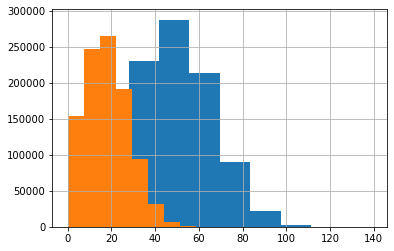

In [17]:
nodes_occupation_email["REL_AGE"].hist()
nodes_occupation_email["REL_ADD_DT"].hist()

**Label Encoding and One Hot Encoding**

In [18]:
LE = LabelEncoder()
OE= OneHotEncoder()

In [19]:
cropped_dt = nodes_occupation_email[['OCPTN_NM', 'RES_CNTRY_CA',
       'CNTRY_OF_INCOME_CA', 'PEP_FL', 'CASH_SUM_IN', 'CASH_CNT_IN',
       'CASH_SUM_OUT', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_CNT_IN',
       'WIRES_SUM_OUT', 'WIRES_CNT_OUT', 'COUNTRY_RISK_INCOME',
       'COUNTRY_RISK_RESIDENCY', 'RISK','GENDER',
       'EMAIL_CNT_OUT', 'EMAIL_SUM_OUT', 'EMAIL_CNT_IN', 'EMAIL_SUM_IN',
       'REL_AGE', 'REL_ADD_DT']]

In [20]:
def one_hot_encode_columns(dif, columns):
    df = dif.copy(deep=True)
    # one-hot encode all the columns at once using OneHotEncoder
    for col in columns:
        # one-hot encode the column
        df_encoded = pd.get_dummies(df[col], prefix=col)
        
        # concatenate the encoded dataframe with the original dataframe
        df = pd.concat([df, df_encoded], axis=1)
        
        # drop the original column
        df = df.drop(col, axis=1)
        
    return df

In [21]:
def label_encode_columns(dfi, columns):
    # create a label encoder for each column
    df = dfi.copy(deep=True)
    label_encoders = {col: LabelEncoder() for col in columns}

    # fit and transform the columns using the label encoders
    for col in columns:
        df[col] = label_encoders[col].fit_transform(df[col])

    # create a dictionary of the mapping of encoded values
    encoding_dict = {col: dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_))) for col in columns}

    return df, label_encoders, encoding_dict

In [22]:
df_encoded, label_encoders, encoding_dict = label_encode_columns(one_hot_encode_columns(cropped_dt, ["GENDER"]), ["RISK","COUNTRY_RISK_INCOME","OCPTN_NM", "COUNTRY_RISK_RESIDENCY"])

In [23]:
encoding_dict

{'RISK': {'high': 0, 'low': 1, 'medium': 2},
 'COUNTRY_RISK_INCOME': {'High': 0, 'Low': 1, 'Moderate': 2},
 'OCPTN_NM': {'High': 0, 'Low': 1, 'Moderate': 2},
 'COUNTRY_RISK_RESIDENCY': {'High': 0, 'Low': 1, 'Moderate': 2}}

In [24]:
df = df_encoded.astype(float).copy(deep=True)

In [25]:
df_encoded.dtypes

OCPTN_NM                    int64
RES_CNTRY_CA                int64
CNTRY_OF_INCOME_CA          int64
PEP_FL                    float64
CASH_SUM_IN               float64
CASH_CNT_IN               float64
CASH_SUM_OUT              float64
CASH_CNT_OUT              float64
WIRES_SUM_IN              float64
WIRES_CNT_IN              float64
WIRES_SUM_OUT             float64
WIRES_CNT_OUT             float64
COUNTRY_RISK_INCOME         int64
COUNTRY_RISK_RESIDENCY      int64
RISK                        int64
EMAIL_CNT_OUT             float64
EMAIL_SUM_OUT             float64
EMAIL_CNT_IN              float64
EMAIL_SUM_IN              float64
REL_AGE                   float64
REL_ADD_DT                float64
GENDER_Female               uint8
GENDER_Male                 uint8
dtype: object

**Data Analysis**
> Dropping Null Values (Previously Done)

> Checking through correlation

> Doing VIF Analysis

In [26]:
def remove_collinear_features(xx, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    
    # Calculate the correlation matrix
    x = xx.copy(deep =True)
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

Removed Columns {'CASH_CNT_IN'}


<AxesSubplot:>

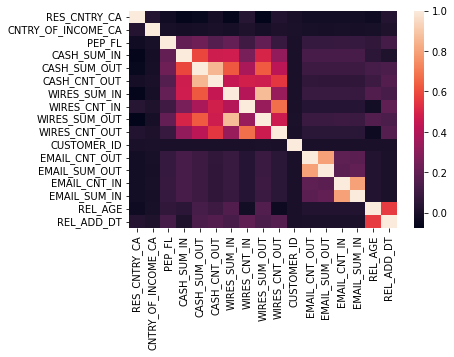

In [27]:
nodes_uncorellated = remove_collinear_features(nodes_occupation_email, 0.90)
sb.heatmap(nodes_uncorellated.corr())

In [28]:
df = df.drop(['RISK'], axis = 1)
df = df.astype(float)
X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const                     0.000000
OCPTN_NM                  1.025702
RES_CNTRY_CA              2.044275
CNTRY_OF_INCOME_CA        1.144058
PEP_FL                    1.092163
CASH_SUM_IN               8.352196
CASH_CNT_IN               7.286231
CASH_SUM_OUT              6.145823
CASH_CNT_OUT              5.162432
WIRES_SUM_IN              5.252938
WIRES_CNT_IN              2.352489
WIRES_SUM_OUT             5.546640
WIRES_CNT_OUT             2.808210
COUNTRY_RISK_INCOME       1.145676
COUNTRY_RISK_RESIDENCY    2.029544
EMAIL_CNT_OUT             2.751629
EMAIL_SUM_OUT             2.758386
EMAIL_CNT_IN              2.750223
EMAIL_SUM_IN              2.756729
REL_AGE                   1.585833
REL_ADD_DT                1.605629
GENDER_Female                  inf
GENDER_Male                    inf
dtype: float64

The variable **'CASH_CNT_IN'** is showing to have a very high correlation to other relation and has causes high **Varaince Inflation Factor Across (VIF)**

In [29]:
df = df_encoded.copy(deep=True)
df = df.drop(['RISK','CASH_CNT_IN'], axis = 1)
df = df.astype(float)
X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                     0.000000
OCPTN_NM                  1.025368
RES_CNTRY_CA              2.044082
CNTRY_OF_INCOME_CA        1.144056
PEP_FL                    1.088359
CASH_SUM_IN               1.654211
CASH_SUM_OUT              5.959154
CASH_CNT_OUT              4.936538
WIRES_SUM_IN              5.246362
WIRES_CNT_IN              2.352289
WIRES_SUM_OUT             5.522387
WIRES_CNT_OUT             2.773076
COUNTRY_RISK_INCOME       1.145644
COUNTRY_RISK_RESIDENCY    2.029526
EMAIL_CNT_OUT             2.751429
EMAIL_SUM_OUT             2.758116
EMAIL_CNT_IN              2.750107
EMAIL_SUM_IN              2.756219
REL_AGE                   1.583302
REL_ADD_DT                1.604906
GENDER_Female                  inf
GENDER_Male                    inf
dtype: float64

After dropping **'CASH_CNT_IN'** the **VIF** dropped across all variables

In [30]:
final_df = df_encoded.drop(['CASH_CNT_IN'], axis = 1)

**Splitting Data into 1%, 10%, 50%, 100% and dividing into Train, Test and Validation data 20% split in each randomly**

In [31]:
def get_data_subsets(df, target_col, fracs=[0.01, 0.1, 0.5, 1.0]):
    subsets = {}
    
    for frac in fracs:
        subset = df.sample(frac=frac)
        X = subset.drop(target_col, axis=1)
        y = subset[target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
        
        subsets[f"{int(frac*100)}%"] = {
            'X_train': X_train,
            'X_test': X_test,
            'X_val': X_val,
            'y_train': y_train,
            'y_test': y_test,
            'y_val': y_val
        }
        
    return subsets

In [32]:
data_subsets = get_data_subsets(final_df, 'RISK')

*Accessing the data*

In [33]:
def get_data_by_percentage(data_subsets, percentage):
    key = f"{percentage}%"
    if key in data_subsets:
        data = data_subsets[key]
        X_train = data['X_train']
        y_train = data['y_train']
        X_test = data['X_test']
        y_test = data['y_test']
        X_val = data['X_val']
        y_val = data['y_val']
        return X_train, y_train, X_test, y_test, X_val, y_val
    else:
        raise ValueError(f"Percentage {percentage}% not found in data subsets.")


In [34]:
# Example Usage for 1%
# Get the data for a specified percentage
X_train, y_train, X_test, y_test, X_val, y_val = get_data_by_percentage(data_subsets, 1)

**Storing data into Pickles**

In [35]:
pickle.dump( data_subsets, open( "divided_data.p", "wb" ) )

In [36]:
# Example Import
#data_subsets = pickle.load( open( "divided_data.p", "rb" ) )

In [37]:
## Google Drive Link for divided_data.p
## https://drive.google.com/file/d/1ZrEg-9708-n1A74kj1GM8-RTUSmcGkxk/view?usp=sharing